In [1]:
# magic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

In [3]:
# training data
train.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,...,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,...,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [4]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

## 1. Basic Statistics

In [5]:
dataset_stats = pd.DataFrame()
dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
dataset_stats['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
dataset_stats['cost'] = train.groupby('advertiser').payprice.sum().values
dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions) * 1000).round(2)).astype(str)
dataset_stats['eCPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

dataset_stats

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,540293,451,37231239,0.083%,68909.35,82552.64
1,2259,146778,45,13649026,0.031%,92990.95,303311.69
2,2261,120619,37,10789152,0.031%,89448.2,291598.7
3,2821,231416,144,20625766,0.062%,89128.52,143234.49
4,2997,54487,251,3413227,0.461%,62642.96,13598.51
5,3358,304782,233,28145288,0.076%,92345.64,120795.23
6,3386,498554,358,38341028,0.072%,76904.46,107097.84
7,3427,454031,340,36820111,0.075%,81096.03,108294.44
8,3476,346778,175,27481402,0.05%,79247.82,157036.58


In [9]:
train['click'].value_counts()

0    2695704
1       2034
Name: click, dtype: int64

## 2. User feedback

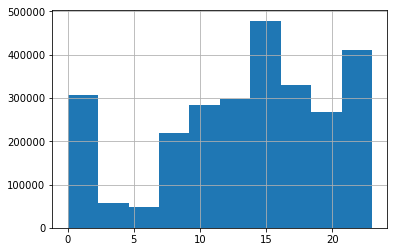

In [6]:
train['hour'].hist()
plt.show()

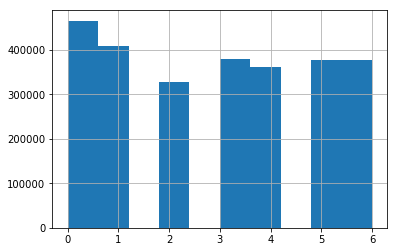

In [7]:
train['weekday'].hist()
plt.show()

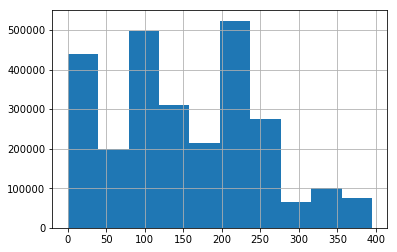

In [8]:
train['region'].hist()
plt.show()

In [10]:
daily_CTR = pd.DataFrame()
daily_CTR['day'] = np.sort(train.weekday.unique())
click = train.groupby('weekday').click.value_counts()
imp_1458 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 
imp_3386 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_3386'] = imp_3386.iloc[imp_3358.index.get_level_values('advertiser') == 3386].values 
click = train.groupby(['advertiser','weekday']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
daily_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values
clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3386]
daily_CTR['clicks_3386'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values
daily_CTR['CTR_1458'] = ((daily_CTR.clicks_1458 / daily_CTR.imps_1458) * 100).round(3)
daily_CTR['CTR_3386'] = ((daily_CTR.clicks_3386 / daily_CTR.imps_3386) * 100).round(3)

In [7]:
daily_CTR

,day,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,83994,33238,66,21,0.079,0.063
1,1,72204,30707,63,11,0.087,0.036
2,2,73810,26206,63,14,0.085,0.053
3,3,76509,81073,68,79,0.089,0.097
4,4,76835,41414,72,39,0.094,0.094
5,5,78485,58888,65,50,0.083,0.085
6,6,78456,33256,54,19,0.069,0.057


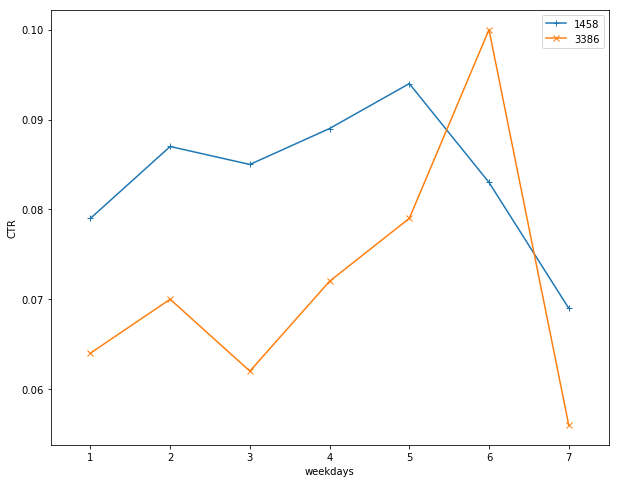

In [13]:
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3386.values,marker='x', label='3386')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(10,8)
plt.draw()
plt.show()

In [14]:
hourly_CTR = pd.DataFrame()
hourly_CTR['hour'] = np.sort(train.hour.unique())
imp_1458 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 
imp_3386 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_3386'] = imp_3386.iloc[imp_3386.index.get_level_values('advertiser') == 3386].values 
click = train.groupby(['advertiser','hour']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
hourly_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values
clickall_3386 = click.iloc[click.index.get_level_values('advertiser') == 3386]
click3386 = list(clickall_3386.iloc[clickall_3386.index.get_level_values('click') == 1].values)
click3386 = click3386[:4] + [0] + click3386[4:]
hourly_CTR['clicks_3386'] = click3386
hourly_CTR['CTR_1458'] = ((hourly_CTR.clicks_1458 / hourly_CTR.imps_1458) * 100).round(3)
hourly_CTR['CTR_3386'] = ((hourly_CTR.clicks_3386 / hourly_CTR.imps_3386) * 100).round(3)

In [15]:
hourly_CTR

,hour,imps_1458,imps_3386,clicks_1458,clicks_3386,CTR_1458,CTR_3386
0,0,25499,39215,23,34,0.090,0.087
1,1,11251,9409,8,4,0.071,0.043
2,2,6811,6214,14,4,0.206,0.064
3,3,7189,6237,6,3,0.083,0.048
4,4,3580,3970,6,0,0.168,0.000
5,5,4292,3318,4,1,0.093,0.030
6,6,5138,2684,2,2,0.039,0.075
7,7,10675,9428,5,6,0.047,0.064
8,8,15682,13257,9,12,0.057,0.091
9,9,19621,13950,18,9,0.092,0.065


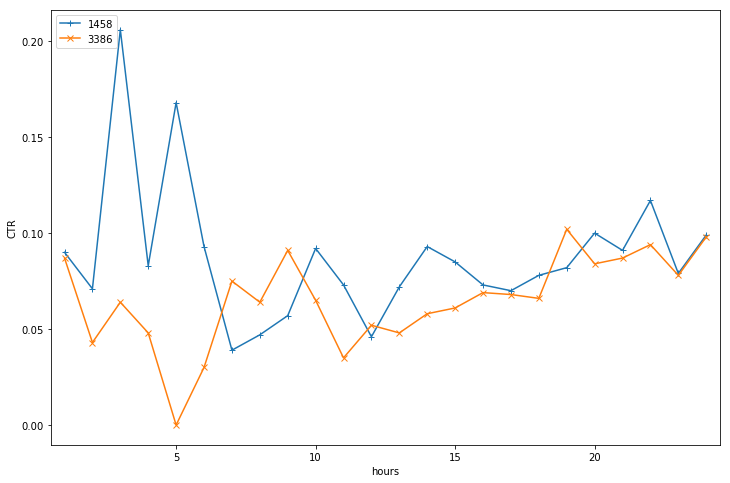

In [16]:
f, ax = plt.subplots(1)
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3386.values,marker='x', label='3386')
plt.legend(loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
ax.set_xlim(xmin = 0.5 , xmax = 24.5)
f.set_size_inches(12,8)
plt.draw()
plt.show()

In [18]:
region_CTR = pd.DataFrame()
region_CTR['region'] = np.sort(train.region.unique())
imp_1458 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 
imp_3386 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_3386'] = imp_3386.iloc[imp_3386.index.get_level_values('advertiser') == 3386].values 
click = train.groupby(['advertiser','region']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
region_CTR['clicks_1458'] = clickall_1458.groupby(level='region').sum().values
clickall_3386 = click.iloc[click.index.get_level_values('advertiser') == 3386]
clickall_3386.iloc[clickall_3358.index.get_level_values('click') == 0]=0
region_CTR['clicks_3386'] = clickall_3386.groupby(level='region').sum().values
region_CTR['CTR_1458'] = ((region_CTR.clicks_1458 / region_CTR.imps_1458) * 100).round(3)
region_CTR['CTR_3386'] = ((region_CTR.clicks_3386 / region_CTR.imps_3386) * 100).round(3)

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:740: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 69 but corresponding boolean dimension is 14
  values[indexer] = value


In [13]:
region_CTR

,region,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,7844,6162,9,13,0.115,0.211
1,1,23389,12157,17,6,0.073,0.049
2,2,8875,4820,3,2,0.034,0.041
3,3,27398,13246,20,15,0.073,0.113
4,15,16674,7968,18,7,0.108,0.088
5,27,7616,3754,5,3,0.066,0.080
6,40,20449,8965,9,6,0.044,0.067
7,55,12091,4823,11,2,0.091,0.041
8,65,12566,5684,11,5,0.088,0.088
9,79,14300,9523,17,9,0.119,0.095


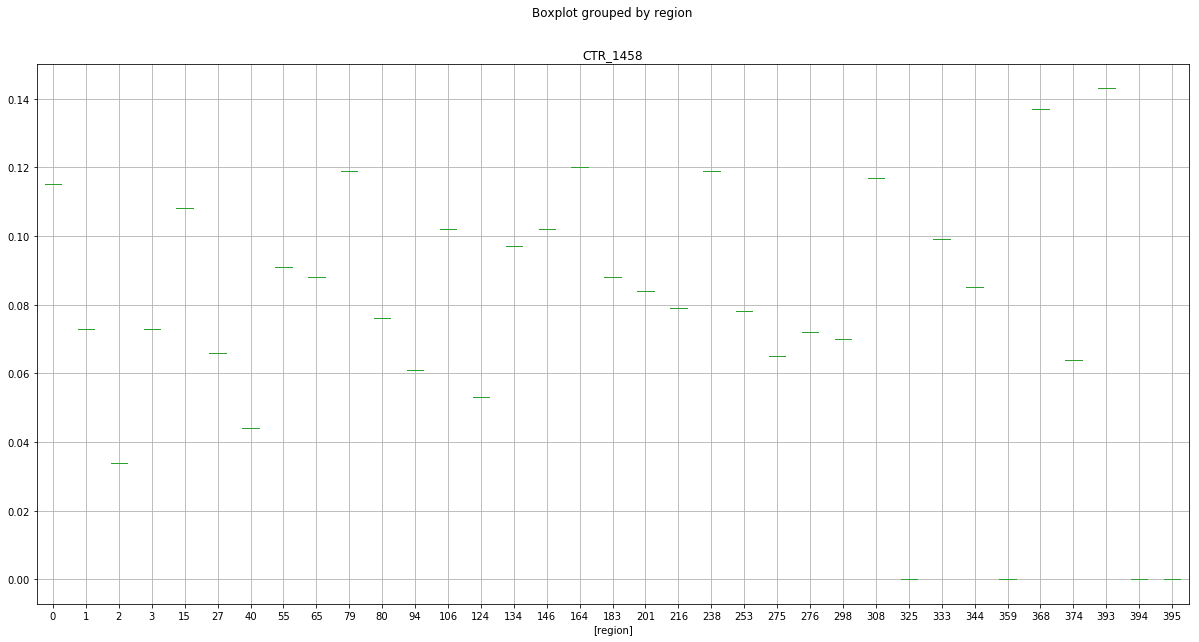

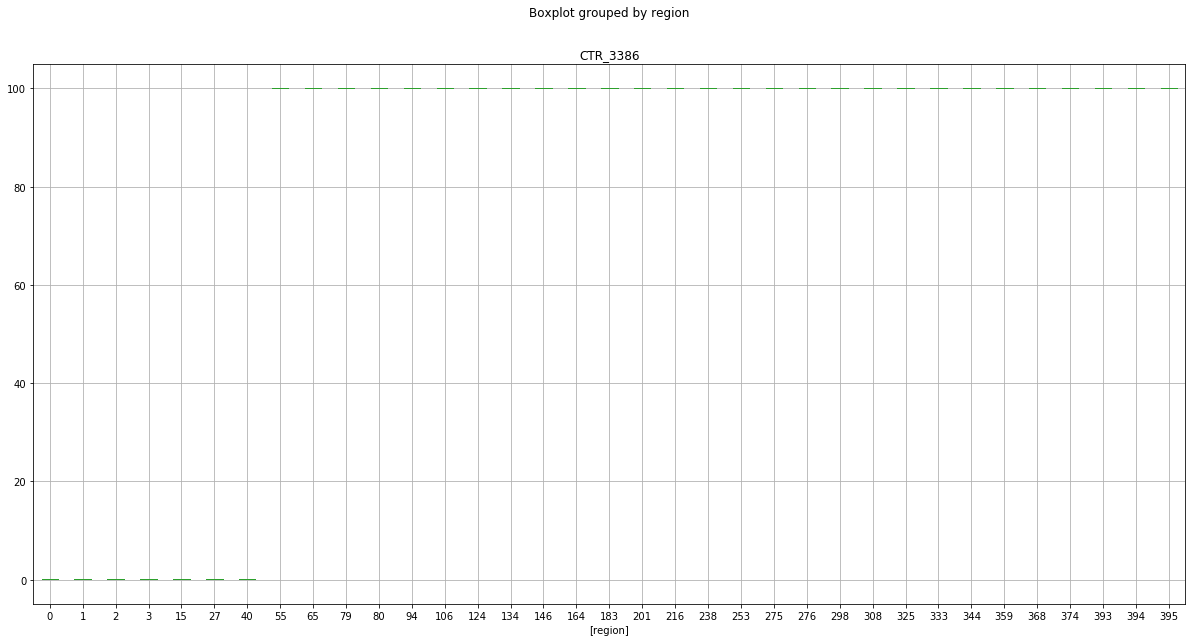

In [19]:
a1=region_CTR[['region','CTR_1458']]
ax1 = a1.boxplot(by='region', return_type='axes',figsize=(20,10))
a2 = region_CTR[['region','CTR_3386']]
a2.boxplot(by='region',figsize=(20,10))

In [22]:
adexchange_CTR = pd.DataFrame()

adexchange_CTR['ad_exchange'] = np.sort(train.adexchange.unique())
adexchange_CTR = adexchange_CTR.drop([3,4])
imp_1458 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3386 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_3386'] = imp_3386.iloc[imp_3386.index.get_level_values('advertiser') == 3386].values 

click = train.groupby(['advertiser','adexchange']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_1458'] = clickall_1458.groupby(level='adexchange').sum().values

clickall_3386 = click.iloc[click.index.get_level_values('advertiser') == 3386]
clickall_3386.iloc[clickall_3386.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_3386'] = clickall_3386.groupby(level='adexchange').sum().values

adexchange_CTR['CTR_1458'] = ((adexchange_CTR.clicks_1458 / adexchange_CTR.imps_1458) * 100).round(3)
adexchange_CTR['CTR_3386'] = ((adexchange_CTR.clicks_3386 / adexchange_CTR.imps_3386) * 100).round(3)

In [23]:
adexchange_CTR

,ad_exchange,imps_1458,imps_3386,clicks_1458,clicks_3386,CTR_1458,CTR_3386
0,1,182219,117569,146,150,0.080,0.128
1,2,160460,164620,126,92,0.079,0.056
2,3,197614,216365,179,116,0.091,0.054


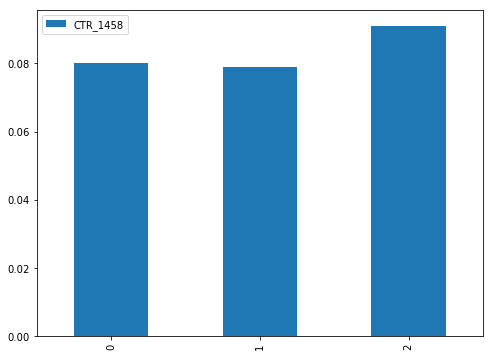

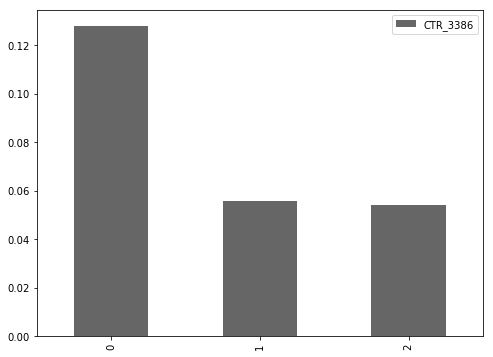

In [25]:
a1=adexchange_CTR[['ad_exchange','CTR_1458']]
ax1 = a1.plot(by='ad_exchange',kind='bar',figsize=(8,6))
a2 = adexchange_CTR[['ad_exchange','CTR_3386']]
a2.plot(by='ad_exchange',kind='bar',colormap='Accent_r',figsize=(8,6))

In [19]:
useragent_CTR.fillna(0.0)

,useragent,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,android_chrome,74,101,1,1,1.351,0.990
1,android_firefox,5,4,0,0,0.000,0.000
2,android_ie,3,2,0,0,0.000,0.000
3,android_maxthon,6,5,0,0,0.000,0.000
4,android_opera,96,145,0,0,0.000,0.000
5,android_other,243,233,2,1,0.823,0.429
6,android_safari,3044,3813,17,15,0.558,0.393
7,android_sogou,1,1,0,0,0.000,0.000
8,ios_other,3,4,0,0,0.000,0.000
9,ios_safari,101,65,0,1,0.000,1.538


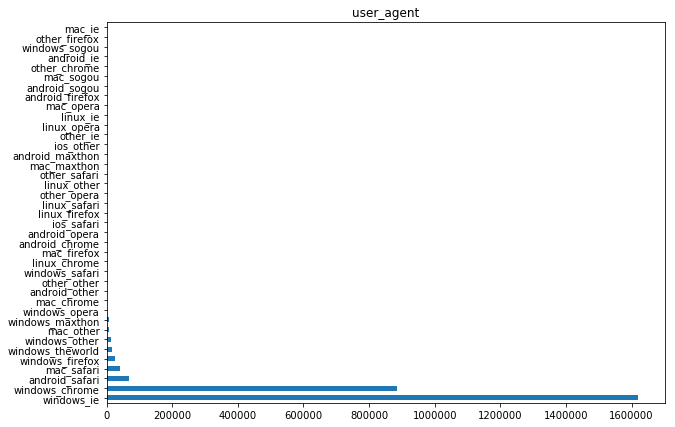

In [43]:
train.useragent.value_counts().plot(kind='barh', figsize=(10,7))
plt.axis('equal')
plt.title('user_agent')

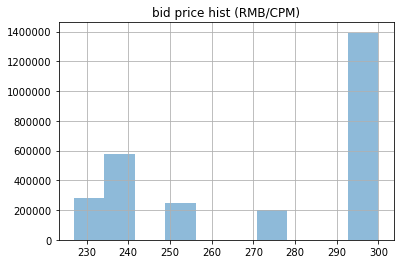

In [52]:
train['bidprice'].hist(alpha=0.5)
plt.title('bid price hist (RMB/CPM)')

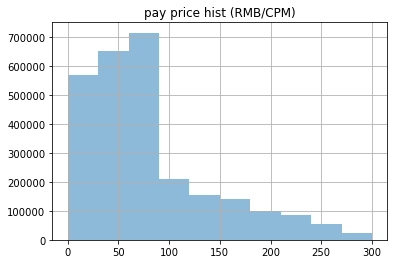

In [53]:
train['payprice'].hist(alpha=0.5)
plt.title('pay price hist (RMB/CPM)')

## 3. Feature engineering & Encoding please see group work

## 4. Quadratic Bidding

In [ ]:
Squared = bid_strategy('nonlinear')
b = Squared[['clicks','bid']].astype(float)
a = Squared[['bid','CTR']].astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.bid,b.clicks)
ax1.set_xlabel('bid')
ax1.set_ylabel('clicks', color='b')
ax2 = ax1.twinx()
ax2.plot(a.bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('QuadraticBidding.PNG', dpi=100)

In [ ]:
# TOP click number
nonlin.iloc[np.where(nonlin.clicks == nonlin.clicks.max())[0]]